In [2]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud
import pandas_profiling
import missingno as msno
import datetime
import re

# Twitter data: emotional words distribution 

## text preprocess

In [3]:
twitter1 = pd.read_csv("tweet original data/Trayvon_Tweets2012.csv",encoding = "latin1",index_col = 0)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
twitter2 = pd.read_csv("tweet original data/TrayvonTweets2013.csv",encoding = "latin1", index_col = 0)

In [5]:
def date(dates):
    delta=datetime.timedelta(days=dates)
    today=datetime.datetime.strptime('1899-12-30 00:00:00','%Y-%m-%d %H:%M:%S')+delta
    return datetime.datetime.strftime(today,'%Y-%m-%d %H:%M:%S')

In [379]:
twitter = pd.concat([twitter1,twitter2],ignore_index=True)

In [380]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097150 entries, 0 to 2097149
Data columns (total 20 columns):
id                      int64
message_id              int64
user_handle             object
orig_user_id            int64
orig_user_handle        object
topsy_type              object
orig_date_posted_gmt    float64
date_posted_gmt         float64
message                 object
orig_user_location      object
coordinates             object
tweet_location          object
longitude               float64
latitude                float64
created_at_gmt          float64
seconds_after_event     float64
FIPS                    object
County                  object
City                    object
State                   object
dtypes: float64(6), int64(3), object(11)
memory usage: 320.0+ MB


### subsample data

In [381]:
twitter = twitter.sample(n =40000)
twitter = twitter.reset_index()

In [382]:
data_msg_time=twitter[['date_posted_gmt','message']]
data_msg_time.head()

,date_posted_gmt,message
0,41010.816019,Is tweeting every minute too much? Not hating ...
1,40993.753403,Trayvon Martin's killer George Zimmerman: 407-...
2,41474.739850,"""If Trayvon Martin was aged and armed, could h..."
3,41485.663275,Sean Bell Vs Bingo @EBCRuckerPark 2 Best Teams...
4,41011.642431,Special Prosecutor Angela Corey charges George...


### convert time format correctly

In [383]:
data_msg_time.to_csv(r'/Users/alphalu/Desktop/ADL/capstone/tweet/1.csv')


In [384]:
data_msg_time=pd.read_csv(r'/Users/alphalu/Desktop/ADL/capstone/tweet/1.csv')
data_msg_time.head()


,date_posted_gmt,message
0,4/11/12 19:35,Is tweeting every minute too much? Not hating ...
1,3/25/12 18:04,Trayvon Martin's killer George Zimmerman: 407-...
2,7/19/13 17:45,"""If Trayvon Martin was aged and armed, could h..."
3,7/30/13 15:55,Sean Bell Vs Bingo @EBCRuckerPark 2 Best Teams...
4,4/12/12 15:25,Special Prosecutor Angela Corey charges George...


In [385]:
data_msg_time['date']=pd.to_datetime(data_msg_time['date_posted_gmt'])

data_msg_time['year']=data_msg_time['date'].apply(lambda x: x.year)

data_msg_time['month']=data_msg_time['date'].apply(lambda x: x.month)

data_msg_time['day']=data_msg_time['date'].apply(lambda x: x.day)

data_msg_time.drop(['date_posted_gmt'], axis=1)
data_msg_time.head()

,date_posted_gmt,message,date,year,month,day
0,4/11/12 19:35,Is tweeting every minute too much? Not hating ...,2012-04-11 19:35:00,2012,4,11
1,3/25/12 18:04,Trayvon Martin's killer George Zimmerman: 407-...,2012-03-25 18:04:00,2012,3,25
2,7/19/13 17:45,"""If Trayvon Martin was aged and armed, could h...",2013-07-19 17:45:00,2013,7,19
3,7/30/13 15:55,Sean Bell Vs Bingo @EBCRuckerPark 2 Best Teams...,2013-07-30 15:55:00,2013,7,30
4,4/12/12 15:25,Special Prosecutor Angela Corey charges George...,2012-04-12 15:25:00,2012,4,12


In [386]:
data_msg_time.loc[:,'message'] = data_msg_time.loc[:,'message'].fillna('nan')

In [387]:
data_msg_time.to_csv(r'/Users/alphalu/Desktop/ADL/capstone/tweet/data_msg_time.csv')


### divide into 2012 2013 2014

In [388]:
data_msg_time2012=data_msg_time[data_msg_time['year']==2012]
data_msg_time2013=data_msg_time[data_msg_time['year']==2013]
data_msg_time2014=data_msg_time[data_msg_time['year']==2014]

## explore 2012

In [390]:
tweets2012_month_count=data_msg_time2012.groupby('month').count()['message']
tweets2012_month_count

month
2        14
3     11358
4      4525
5       783
6       661
7       707
8       341
9       214
10      191
11      182
12      231
Name: message, dtype: int64

### we can see tweet volume achieves a peak in March and suffers a decline gradually

In [391]:
msg2012=[]
msg2012.append(data_msg_time2012[data_msg_time2012['month']==1]['message'])
msg2012.append(data_msg_time2012[data_msg_time2012['month']==2]['message'])
msg2012.append(data_msg_time2012[data_msg_time2012['month']==3]['message'])
msg2012.append(data_msg_time2012[data_msg_time2012['month']==4]['message'])
msg2012.append(data_msg_time2012[data_msg_time2012['month']==5]['message'])
msg2012.append(data_msg_time2012[data_msg_time2012['month']==6]['message'])

msg2012.append(data_msg_time2012[data_msg_time2012['month']==7]['message'])
msg2012.append(data_msg_time2012[data_msg_time2012['month']==8]['message'])
msg2012.append(data_msg_time2012[data_msg_time2012['month']==9]['message'])
msg2012.append(data_msg_time2012[data_msg_time2012['month']==10]['message'])
msg2012.append(data_msg_time2012[data_msg_time2012['month']==11]['message'])
msg2012.append(data_msg_time2012[data_msg_time2012['month']==12]['message'])


### create a dic to store the word fraction(‱) appears in each month in 2012

- formula: 10000 x #times the word appears in a message / # number of message generated in that month

In [392]:
dic={'fear':0,
     'sad':0,
     'shit':0,
     'angry':0,
     'cry':0,
     'sorry':0,
     'fuck':0,
     'broke':0,
     'bad':0,
     'tragic':0,
     'mad':0}

### count word freq by emotion words

In [393]:
count2012=[]
for monthly_record in msg2012:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'fear' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic['fear']=count2012

count2012=[]
for monthly_record in msg2012:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'sad' in line:
            count+=1
        if 'sadness' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic['sad']=count2012

count2012=[]
for monthly_record in msg2012:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'shit' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic['shit']=count2012

count2012=[]
for monthly_record in msg2012:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'angry' in line:
            count+=1
        if 'angried' in line:
            count+=1
        if 'anger' in line:
            count+=1
        if 'angrying' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic['angry']=count2012



count2012=[]
for monthly_record in msg2012:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'cry' in line:
            count+=1
        if 'cries' in line:
            count+=1
        if 'cring' in line:
            count+=1
        if 'cried' in line:
            count+=1
        if 'tear' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic['cry']=count2012

count2012=[]
for monthly_record in msg2012:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'fuck' in line:
            count+=1
        if 'fck' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic['fuck']=count2012

count2012=[]
for monthly_record in msg2012:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'broke' in line:
            count+=1
        if 'break' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic['broke']=count2012

count2012=[]
for monthly_record in msg2012:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'sorry' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic['sorry']=count2012


count2012=[]
for monthly_record in msg2012:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'mad' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic['mad']=count2012


count2012=[]
for monthly_record in msg2012:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'tragic' in line:
            count+=1
        if 'tragedy' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic['tragic']=count2012

In [394]:
dic['angry']

[0.0,
 0.0,
 42.26096143687269,
 30.939226519337016,
 25.54278416347382,
 0.0,
 127.2984441301273,
 0.0,
 46.728971962616825,
 0.0,
 0.0,
 86.58008658008659]

In [395]:
dic

{'fear': [0.0,
  0.0,
  26.413100898045432,
  13.259668508287293,
  12.77139208173691,
  45.38577912254161,
  28.28854314002829,
  29.325513196480937,
  0.0,
  0.0,
  0.0,
  0.0],
 'sad': [0.0,
  0.0,
  104.7719668955802,
  39.77900552486188,
  25.54278416347382,
  90.77155824508321,
  28.28854314002829,
  58.651026392961874,
  93.45794392523365,
  52.35602094240838,
  0.0,
  0.0],
 'shit': [0.0,
  714.2857142857143,
  128.5437577038211,
  101.65745856353591,
  76.62835249042146,
  75.642965204236,
  84.86562942008487,
  117.30205278592375,
  186.9158878504673,
  104.71204188481676,
  0.0,
  0.0],
 'angry': [0.0,
  0.0,
  42.26096143687269,
  30.939226519337016,
  25.54278416347382,
  0.0,
  127.2984441301273,
  0.0,
  46.728971962616825,
  0.0,
  0.0,
  86.58008658008659],
 'cry': [0.0,
  0.0,
  59.869695368902974,
  68.50828729281768,
  76.62835249042146,
  30.257186081694403,
  42.432814710042436,
  29.325513196480937,
  93.45794392523365,
  0.0,
  0.0,
  0.0],
 'sorry': [0.0,
  0.0

## convert dict to dataframe

In [396]:
freq2012=pd.DataFrame.from_dict(dic)
freq2012.index = np.arange(1, len(freq2012) + 1)
freq2012

,fear,sad,shit,angry,cry,sorry,fuck,broke,bad,tragic,mad
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
2,0.000000,0.000000,714.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
3,26.413101,104.771967,128.543758,42.260961,59.869695,4.402183,90.684980,48.424018,0,96.848037,102.130657
4,13.259669,39.779006,101.657459,30.939227,68.508287,46.408840,70.718232,64.088398,0,26.519337,121.546961
5,12.771392,25.542784,76.628352,25.542784,76.628352,0.000000,114.942529,89.399745,0,51.085568,140.485313
6,45.385779,90.771558,75.642965,0.000000,30.257186,30.257186,90.771558,30.257186,0,0.000000,90.771558
7,28.288543,28.288543,84.865629,127.298444,42.432815,42.432815,198.019802,28.288543,0,14.144272,127.298444
8,29.325513,58.651026,117.302053,0.000000,29.325513,0.000000,29.325513,205.278592,0,0.000000,58.651026
9,0.000000,93.457944,186.915888,46.728972,93.457944,0.000000,46.728972,0.000000,0,0.000000,140.186916
10,0.000000,52.356021,104.712042,0.000000,0.000000,0.000000,0.000000,157.068063,0,0.000000,0.000000


In [397]:
freq2012.insert(0, 'month', range(1, 13))

In [398]:
freq2012

,month,fear,sad,shit,angry,cry,sorry,fuck,broke,bad,tragic,mad
1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
2,2,0.000000,0.000000,714.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
3,3,26.413101,104.771967,128.543758,42.260961,59.869695,4.402183,90.684980,48.424018,0,96.848037,102.130657
4,4,13.259669,39.779006,101.657459,30.939227,68.508287,46.408840,70.718232,64.088398,0,26.519337,121.546961
5,5,12.771392,25.542784,76.628352,25.542784,76.628352,0.000000,114.942529,89.399745,0,51.085568,140.485313
6,6,45.385779,90.771558,75.642965,0.000000,30.257186,30.257186,90.771558,30.257186,0,0.000000,90.771558
7,7,28.288543,28.288543,84.865629,127.298444,42.432815,42.432815,198.019802,28.288543,0,14.144272,127.298444
8,8,29.325513,58.651026,117.302053,0.000000,29.325513,0.000000,29.325513,205.278592,0,0.000000,58.651026
9,9,0.000000,93.457944,186.915888,46.728972,93.457944,0.000000,46.728972,0.000000,0,0.000000,140.186916
10,10,0.000000,52.356021,104.712042,0.000000,0.000000,0.000000,0.000000,157.068063,0,0.000000,0.000000


### remove first 2 months coz there is no tweets records

In [399]:
freq2012_subset=freq2012.iloc[2:]
freq2012_subset

,month,fear,sad,shit,angry,cry,sorry,fuck,broke,bad,tragic,mad
3,3,26.413101,104.771967,128.543758,42.260961,59.869695,4.402183,90.684980,48.424018,0,96.848037,102.130657
4,4,13.259669,39.779006,101.657459,30.939227,68.508287,46.408840,70.718232,64.088398,0,26.519337,121.546961
5,5,12.771392,25.542784,76.628352,25.542784,76.628352,0.000000,114.942529,89.399745,0,51.085568,140.485313
6,6,45.385779,90.771558,75.642965,0.000000,30.257186,30.257186,90.771558,30.257186,0,0.000000,90.771558
7,7,28.288543,28.288543,84.865629,127.298444,42.432815,42.432815,198.019802,28.288543,0,14.144272,127.298444
8,8,29.325513,58.651026,117.302053,0.000000,29.325513,0.000000,29.325513,205.278592,0,0.000000,58.651026
9,9,0.000000,93.457944,186.915888,46.728972,93.457944,0.000000,46.728972,0.000000,0,0.000000,140.186916
10,10,0.000000,52.356021,104.712042,0.000000,0.000000,0.000000,0.000000,157.068063,0,0.000000,0.000000
11,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.945055,0.000000,0,0.000000,0.000000
12,12,0.000000,0.000000,0.000000,86.580087,0.000000,0.000000,86.580087,86.580087,0,0.000000,86.580087


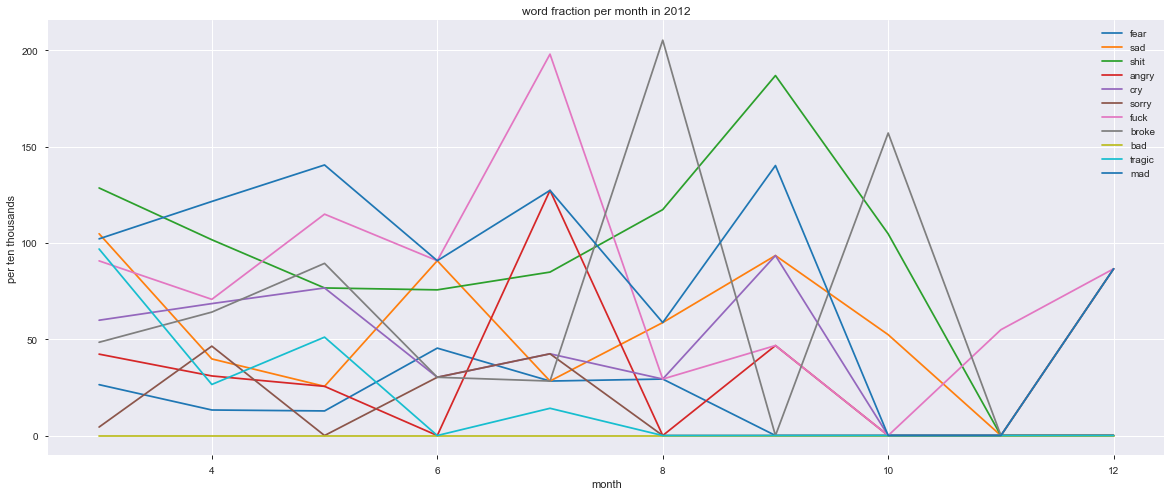

In [413]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(20,8))
plt.title('word fraction per month in 2012')
plt.xlabel('month in 2012')
plt.ylabel('per ten thousands')
# gca stands for 'get current axis'
ax = plt.gca()

freq2012_subset.plot(kind='line',x='month',y='fear',ax=ax)
freq2012_subset.plot(kind='line',x='month',y='sad', ax=ax)
freq2012_subset.plot(kind='line',x='month',y='shit',ax=ax)
freq2012_subset.plot(kind='line',x='month',y='angry', ax=ax)
freq2012_subset.plot(kind='line',x='month',y='cry',ax=ax)
freq2012_subset.plot(kind='line',x='month',y='sorry', ax=ax)
freq2012_subset.plot(kind='line',x='month',y='fuck',ax=ax)
freq2012_subset.plot(kind='line',x='month',y='broke', ax=ax)
freq2012_subset.plot(kind='line',x='month',y='bad', ax=ax)
freq2012_subset.plot(kind='line',x='month',y='tragic',ax=ax)
freq2012_subset.plot(kind='line',x='month',y='mad', ax=ax)

plt.show()

## explore 2013


In [401]:
msg2013=[]

msg2013.append(data_msg_time2013[data_msg_time2013['month']==1]['message'])
msg2013.append(data_msg_time2013[data_msg_time2013['month']==2]['message'])
msg2013.append(data_msg_time2013[data_msg_time2013['month']==3]['message'])
msg2013.append(data_msg_time2013[data_msg_time2013['month']==4]['message'])
msg2013.append(data_msg_time2013[data_msg_time2013['month']==5]['message'])
msg2013.append(data_msg_time2013[data_msg_time2013['month']==6]['message'])

msg2013.append(data_msg_time2013[data_msg_time2013['month']==7]['message'])
msg2013.append(data_msg_time2013[data_msg_time2013['month']==8]['message'])
msg2013.append(data_msg_time2013[data_msg_time2013['month']==9]['message'])
msg2013.append(data_msg_time2013[data_msg_time2013['month']==10]['message'])
msg2013.append(data_msg_time2013[data_msg_time2013['month']==11]['message'])
msg2013.append(data_msg_time2013[data_msg_time2013['month']==12]['message'])


### tweets dist among 2013

In [402]:
tweets2013_month_count=data_msg_time2013.groupby('month').count()['message']
tweets2013_month_count

month
1       268
2       552
7     14108
8      1082
9       572
10      357
11      681
12      354
Name: message, dtype: int64

In [403]:
dic2013={'fear':0,
     'sad':0,
     'shit':0,
     'angry':0,
     'cry':0,
     'sorry':0,
     'fuck':0,
     'broke':0,
     'bad':0,
     'tragic':0,
     'mad':0}

In [404]:
count2012=[]
for monthly_record in msg2013:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'fear' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic2013['fear']=count2012

count2012=[]
for monthly_record in msg2013:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'sad' in line:
            count+=1
        if 'sadness' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic2013['sad']=count2012

count2012=[]
for monthly_record in msg2013:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'shit' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic2013['shit']=count2012

count2012=[]
for monthly_record in msg2013:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'angry' in line:
            count+=1
        if 'angried' in line:
            count+=1
        if 'anger' in line:
            count+=1
        if 'angrying' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic2013['angry']=count2012



count2012=[]
for monthly_record in msg2013:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'cry' in line:
            count+=1
        if 'cries' in line:
            count+=1
        if 'cring' in line:
            count+=1
        if 'cried' in line:
            count+=1
        if 'tear' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic2013['cry']=count2012

count2012=[]
for monthly_record in msg2013:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'fuck' in line:
            count+=1
        if 'fck' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic2013['fuck']=count2012

count2012=[]
for monthly_record in msg2013:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'broke' in line:
            count+=1
        if 'break' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic2013['broke']=count2012

count2012=[]
for monthly_record in msg2013:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'sorry' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic2013['sorry']=count2012


count2012=[]
for monthly_record in msg2013:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'mad' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic2013['mad']=count2012


count2012=[]
for monthly_record in msg2013:
    count=0
    record=0
    for line in monthly_record:
        record+=1
        if 'tragic' in line:
            count+=1
        if 'tragedy' in line:
            count+=1
    count2012.append(10000*count/max(record,1))
dic2013['tragic']=count2012

In [405]:
freq2013=pd.DataFrame.from_dict(dic2013)
freq2013.index = np.arange(1, len(freq2013) + 1)
freq2013

,fear,sad,shit,angry,cry,sorry,fuck,broke,bad,tragic,mad
1,0.000000,0.000000,37.313433,0.000000,74.626866,37.313433,0.000000,0.000000,0,0.000000,37.313433
2,18.115942,18.115942,126.811594,36.231884,18.115942,36.231884,36.231884,0.000000,0,0.000000,72.463768
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
7,33.314432,49.617238,110.575560,60.958322,32.605614,22.682166,116.954919,62.375957,0,119.790190,109.866742
8,18.484288,46.210721,92.421442,73.937153,18.484288,27.726433,36.968577,92.421442,0,27.726433,138.632163
9,52.447552,17.482517,52.447552,87.412587,17.482517,0.000000,87.412587,52.447552,0,17.482517,34.965035
10,28.011204,84.033613,168.067227,28.011204,56.022409,28.011204,224.089636,0.000000,0,0.000000,140.056022


In [406]:
freq2013.insert(0, 'month', range(1, 13))
freq2013_subset=freq2013.copy()

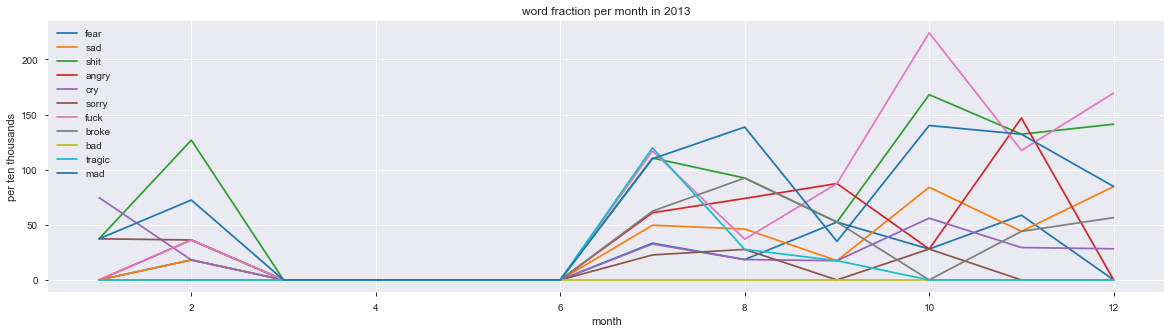

In [407]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(20,5))
plt.title('word fraction per month in 2013')
plt.xlabel('month in 2013')
plt.ylabel('per ten thousands')

# gca stands for 'get current axis'
ax = plt.gca()

freq2013_subset.plot(kind='line',x='month',y='fear',ax=ax)
freq2013_subset.plot(kind='line',x='month',y='sad', ax=ax)
freq2013_subset.plot(kind='line',x='month',y='shit',ax=ax)
freq2013_subset.plot(kind='line',x='month',y='angry', ax=ax)
freq2013_subset.plot(kind='line',x='month',y='cry',ax=ax)
freq2013_subset.plot(kind='line',x='month',y='sorry', ax=ax)
freq2013_subset.plot(kind='line',x='month',y='fuck',ax=ax)
freq2013_subset.plot(kind='line',x='month',y='broke', ax=ax)
freq2013_subset.plot(kind='line',x='month',y='bad', ax=ax)
freq2013_subset.plot(kind='line',x='month',y='tragic',ax=ax)
freq2013_subset.plot(kind='line',x='month',y='mad', ax=ax)

plt.show()